# Trabalho 2 - Aprendizado de Máquina (EEL7513)

### Ruan Luiz Molgero Lopes - 20100866

In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, balanced_accuracy_score
from sklearn.model_selection import GridSearchCV, train_test_split, PredefinedSplit
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from wordcloud import WordCloud

# Carregamento dos dados e EDA inicial


In [3]:
df = pd.read_csv("../data/tweets.csv")
df.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [4]:
df["sentiment"].value_counts()

sentiment
neutral     11118
positive     8582
negative     7781
Name: count, dtype: int64

In [5]:
df["target"] = df["sentiment"].map({"neutral": 0, "positive": 0, "negative": 1,})
df.head()

,textID,text,selected_text,sentiment,target
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,0
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,1
2,088c60f138,my boss is bullying me...,bullying me,negative,1
3,9642c003ef,what interview! leave me alone,leave me alone,negative,1
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         27481 non-null  object
 1   text           27480 non-null  object
 2   selected_text  27480 non-null  object
 3   sentiment      27481 non-null  object
 4   target         27481 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.0+ MB


In [7]:
df.isnull().sum()

textID           0
text             1
selected_text    1
sentiment        0
target           0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df = df.dropna()
print(df.isnull().sum())

textID           0
text             0
selected_text    0
sentiment        0
target           0
dtype: int64


# Histogramas

### Número de Caracteres

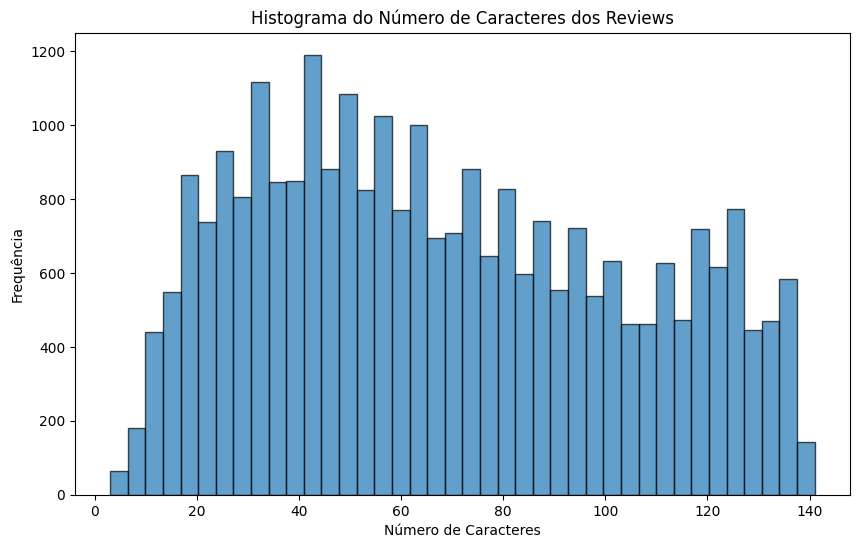

In [10]:
df['char_count'] = df['text'].apply(len)

plt.figure(figsize=(10, 6))
# sns.histplot(df['char_count'], bins=50, kde=True)
df['char_count'].plot(kind='hist', bins=40, alpha=0.7, edgecolor='black')
plt.title('Histograma do Número de Caracteres dos Reviews')
plt.xlabel('Número de Caracteres')
plt.ylabel('Frequência')
plt.show()

### Número de Palavras

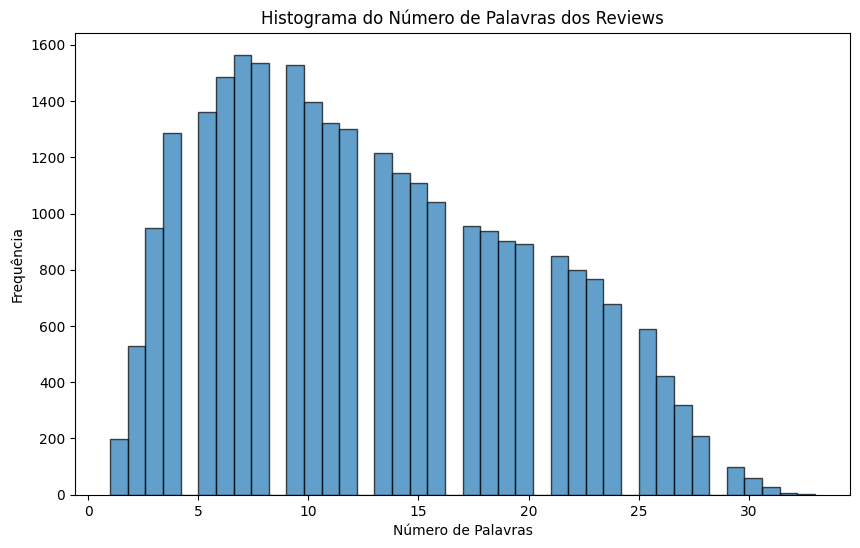

In [11]:
df['word_count'] = df['text'].apply(lambda x: len(x.split()))

plt.figure(figsize=(10, 6))
df['word_count'].plot(kind='hist', bins=40, alpha=0.7, edgecolor='black')
plt.title('Histograma do Número de Palavras dos Reviews')
plt.xlabel('Número de Palavras')
plt.ylabel('Frequência')
plt.show()

### Mostre os 5 maiores e menores comentários e o sentimento relacionado

In [12]:
top5_largest = df.nlargest(5, 'word_count')
for index, row in top5_largest.iterrows():
    print(f"Comentário: {row['text']}\nSentimento: {row['sentiment']}\n")

# top5_largest = df.nlargest(5, 'char_count')
# for index, row in top5_largest.iterrows():
#     print(f"Comentário: {row['text']}\nSentimento: {row['sentiment']}\n")

Comentário: AK, flop comes 2K6 I bet 15 get raised to 25 I call, turn is A, we check, river rag, then I check and he bets 15, I raise 15 he calls, 22
Sentimento: neutral

Comentário: : Lol it went okay! As far as I can tell . But then I had to do a test today for geo and I was all zoned out and got like 65%
Sentimento: positive

Comentário: How I wish I get at least 2 days-off in a row. 1 day off is not enough to rest.  3 days on, 1 day off, 4 days on, 1 day off...Ugh!!!
Sentimento: negative

Comentário: My car is in the car hospital for the nxt 7 days  I gotta go pick up a loaner car b4 6! Bein without wheels 4 7day will set me back heavy!
Sentimento: neutral

Comentário: First Happy Mothers Day  Second what is it that makes us think the way we do? Why do we feel the way we feel? I dont know but i wish i did
Sentimento: positive



In [13]:
top5_smallest = df.nsmallest(5, 'word_count')
for index, row in top5_smallest.iterrows():
    print(f"Comentário: {row['text']}\nSentimento: {row['sentiment']}\n")

# top5_smallest = df.nsmallest(5, 'char_count')
# for index, row in top5_smallest.iterrows():
#     print(f"Comentário: {row['text']}\nSentimento: {row['sentiment']}\n")

Comentário: MAYDAY?!
Sentimento: neutral

Comentário: Chilliin
Sentimento: positive

Comentário:  Absolutely
Sentimento: neutral

Comentário: _nesmith
Sentimento: neutral

Comentário:  Thx
Sentimento: neutral



### Wordcloud

In [14]:
def print_wordcloud(data, title = None):
    wordcloud = WordCloud(background_color='white').generate(data)

    plt.imshow(wordcloud)
    plt.axis('off')

    if title:
        plt.title(title)

    plt.show()

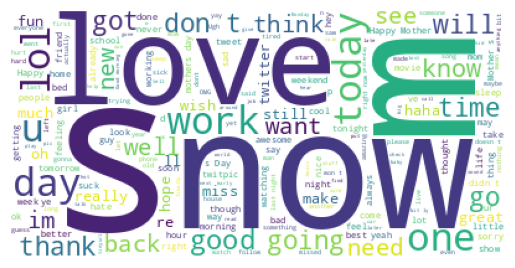

In [15]:
print_wordcloud(' '.join(tweet for tweet in df.text))

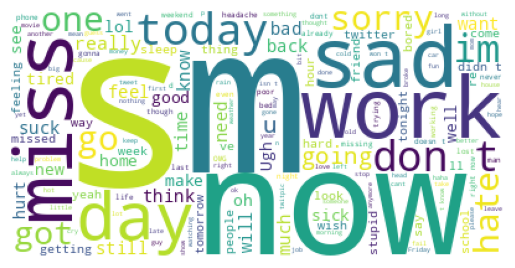

In [16]:
print_wordcloud(" ".join(tweet for tweet in df[df["sentiment"] == "negative"].text))

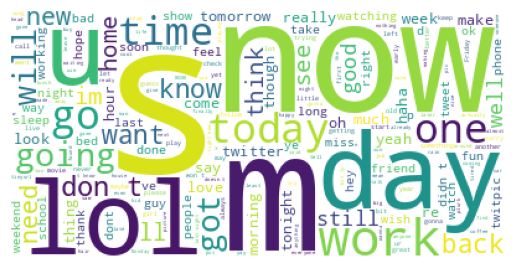

In [17]:
print_wordcloud(" ".join(tweet for tweet in df[df["sentiment"] == "neutral"].text))

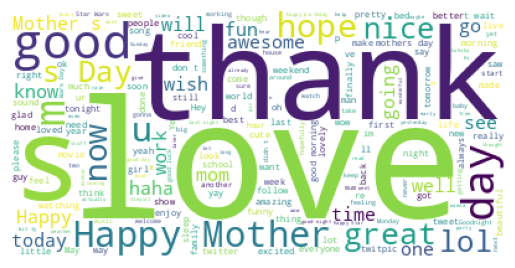

In [18]:
print_wordcloud(" ".join(tweet for tweet in df[df["sentiment"] == "positive"].text))

### Mostre a distribuição da variável alvo através de um gráfico de barras

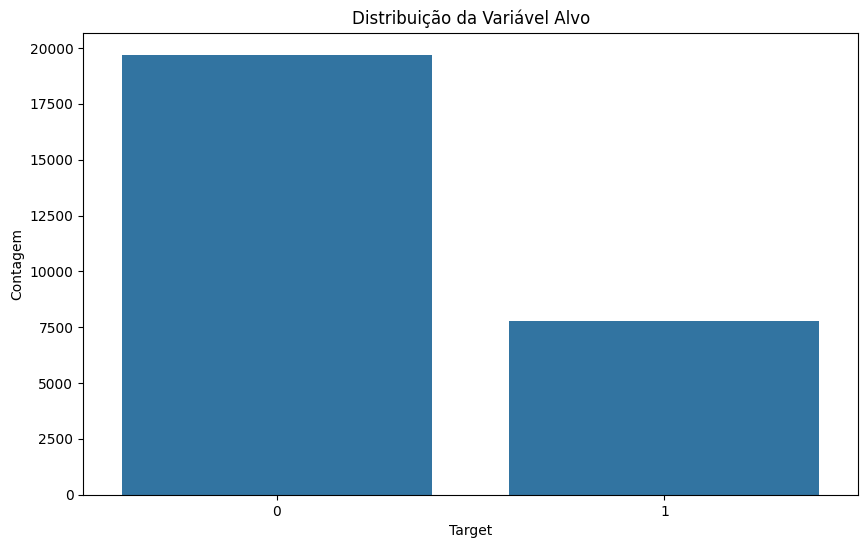

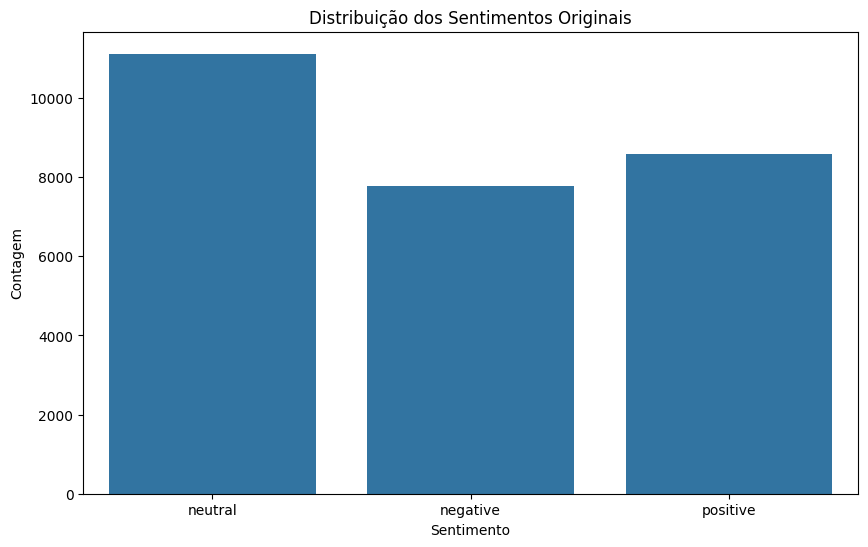

In [19]:
# Distribuição da variável alvo
plt.figure(figsize=(10, 6))
sns.countplot(x='target', data=df)
plt.title('Distribuição da Variável Alvo')
plt.xlabel('Target')
plt.ylabel('Contagem')
plt.show()

# Distribuição dos sentimentos originais
plt.figure(figsize=(10, 6))
sns.countplot(x='sentiment', data=df)
plt.title('Distribuição dos Sentimentos Originais')
plt.xlabel('Sentimento')
plt.ylabel('Contagem')
plt.show()

# Limpeza e separação dos dados

## Limpeza

In [20]:
df = df.drop(columns=["textID", "selected_text", "sentiment", "char_count", "word_count"])
df.head()

,text,target
0,"I`d have responded, if I were going",0
1,Sooo SAD I will miss you here in San Diego!!!,1
2,my boss is bullying me...,1
3,what interview! leave me alone,1
4,"Sons of ****, why couldn`t they put them on t...",1


In [24]:
print("Dados faltantes:")
print(df.isnull().sum())
print("\nDados duplicados:")
print(df.duplicated().sum())

Dados faltantes:
text      0
target    0
dtype: int64

Dados duplicados:
0


## Split

### Divisão Estratificada dos Dados

Para garantir que a distribuição da variável alvo `target` seja mantida tanto no conjunto de treino quanto no conjunto de teste, utilizaremos a divisão estratificada. Vamos separar 20% dos dados para teste.


In [31]:

X_train_val, X_test, y_train_val, y_test = train_test_split(
    df['text'],
    df['target'],
    test_size=0.2,
    stratify=df['target'],
    random_state=42
)

In [32]:
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val,
    y_train_val,
    # 0.8*0.25 = 20% do total
    test_size=0.25,
    stratify=y_train_val,
    random_state=42
)

Será usada validação hold-out

In [33]:
print(f"Quantidade de dados em X_train: {X_train.shape[0]}; {X_train.shape[0] / (X_train_val.shape[0] + X_test.shape[0])}")
print(f"Quantidade de dados em X_val: {X_val.shape[0]}; {X_val.shape[0] / (X_train_val.shape[0] + X_test.shape[0])}")
print(f"Quantidade de dados em X_test: {X_test.shape[0]}; {X_test.shape[0] / (X_train_val.shape[0] + X_test.shape[0])}")

print()

Quantidade de dados em X_train: 16488; 0.6
Quantidade de dados em X_val: 5496; 0.2
Quantidade de dados em X_test: 5496; 0.2



In [35]:
# Verificando se X_train, X_val e X_test são arrays 1D
print(f"X_train é 1D: {X_train.ndim == 1}")
print(f"X_val é 1D: {X_val.ndim == 1}")
print(f"X_test é 1D: {X_test.ndim == 1}\n")

# Verificando se y_train, y_val e y_test são arrays 1D
print(f"y_train é 1D: {y_train.ndim == 1}")
print(f"y_val é 1D: {y_val.ndim == 1}")
print(f"y_test é 1D: {y_test.ndim == 1}")

X_train é 1D: True
X_val é 1D: True
X_test é 1D: True

y_train é 1D: True
y_val é 1D: True
y_test é 1D: True


# Seleção de Hiperparâmetros

### Pré-processamento

In [37]:
# Definindo a pipeline de pré-processamento
preprocessing_pipeline = Pipeline([
    ('vectorizer', CountVectorizer())
])

In [38]:
balanced_accuracy = make_scorer(balanced_accuracy_score)

In [39]:
split_index = [-1] * len(X_train) + [0] * len(X_val)
X_train_val_combined = np.concatenate((X_train, X_val))
y_train_val_combined = np.concatenate((y_train, y_val))
ps = PredefinedSplit(test_fold=split_index)

### Regressão Logística

In [46]:
# Definindo a pipeline de treinamento com a regressão logística
pipeline_lr = Pipeline([
    ('preprocessing', preprocessing_pipeline),
    ('classifier', LogisticRegression(max_iter=1000))
])

param_grid_lr = {"classifier__C": [0.01, 0.1, 1, 10, 100]}

grid_search_lr = GridSearchCV(pipeline_lr, param_grid_lr, scoring=balanced_accuracy,n_jobs=8, verbose=2, cv=ps)

In [47]:
grid_search_lr.fit(X_train_val_combined, y_train_val_combined)

Fitting 1 folds for each of 5 candidates, totalling 5 fits


[CV] END .................................classifier__C=0.01; total time=   0.6s
[CV] END ..................................classifier__C=0.1; total time=   0.7s
[CV] END ....................................classifier__C=1; total time=   0.8s
[CV] END ...................................classifier__C=10; total time=   0.8s
[CV] END ..................................classifier__C=100; total time=   0.9s


GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
             estimator=Pipeline(steps=[('preprocessing',
                                        Pipeline(steps=[('vectorizer',
                                                         CountVectorizer())])),
                                       ('classifier',
                                        LogisticRegression(max_iter=1000))]),
             n_jobs=8, param_grid={'classifier__C': [0.01, 0.1, 1, 10, 100]},
             scoring=make_scorer(balanced_accuracy_score, response_method='predict'),
             verbose=2)

In [48]:
print("Melhores parâmetros (LR):", grid_search_lr.best_params_)
print("Melhor score (LR):", grid_search_lr.best_score_)

Melhores parâmetros (LR): {'classifier__C': 10}
Melhor score (LR): 0.7482331371602312


#### Teste mudando os parâmetro no CountVectorizer

In [50]:
pipeline_lr_cv = Pipeline([
    ("preprocessing", CountVectorizer()),
    ("classifier", LogisticRegression(max_iter=1000))
])

param_grid_lr_cv = {
    "preprocessing__max_df": (0.5, 0.75, 1.0),
    "preprocessing__ngram_range": [(1, 1), (1, 2), (1, 3)],
    "preprocessing__min_df": [1, 2, 3],
    "classifier__C": [0.01, 0.1, 1, 10, 100],
}

grid_search_lr_cv = GridSearchCV(pipeline_lr_cv, param_grid_lr_cv, scoring=balanced_accuracy, n_jobs=8, verbose=2, cv=ps)

grid_search_lr_cv.fit(X_train_val_combined, y_train_val_combined)

Fitting 1 folds for each of 135 candidates, totalling 135 fits
[CV] END classifier__C=0.01, preprocessing__max_df=0.5, preprocessing__min_df=1, preprocessing__ngram_range=(1, 1); total time=   0.6s
[CV] END classifier__C=0.01, preprocessing__max_df=0.5, preprocessing__min_df=3, preprocessing__ngram_range=(1, 1); total time=   0.6s
[CV] END classifier__C=0.01, preprocessing__max_df=0.5, preprocessing__min_df=2, preprocessing__ngram_range=(1, 1); total time=   0.7s
[CV] END classifier__C=0.01, preprocessing__max_df=0.5, preprocessing__min_df=3, preprocessing__ngram_range=(1, 2); total time=   1.1s
[CV] END classifier__C=0.01, preprocessing__max_df=0.75, preprocessing__min_df=1, preprocessing__ngram_range=(1, 1); total time=   0.5s
[CV] END classifier__C=0.01, preprocessing__max_df=0.5, preprocessing__min_df=2, preprocessing__ngram_range=(1, 2); total time=   1.2s
[CV] END classifier__C=0.01, preprocessing__max_df=0.75, preprocessing__min_df=2, preprocessing__ngram_range=(1, 1); total tim

GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
             estimator=Pipeline(steps=[('preprocessing', CountVectorizer()),
                                       ('classifier',
                                        LogisticRegression(max_iter=1000))]),
             n_jobs=8,
             param_grid={'classifier__C': [0.01, 0.1, 1, 10, 100],
                         'preprocessing__max_df': (0.5, 0.75, 1.0),
                         'preprocessing__min_df': [1, 2, 3],
                         'preprocessing__ngram_range': [(1, 1), (1, 2),
                                                        (1, 3)]},
             scoring=make_scorer(balanced_accuracy_score, response_method='predict'),
             verbose=2)

In [51]:
print("Melhores parâmetros (LR + Custom CV):", grid_search_lr_cv.best_params_)
print("Melhor score (LR + Custom CV):", grid_search_lr_cv.best_score_)

Melhores parâmetros (LR + Custom CV): {'classifier__C': 100, 'preprocessing__max_df': 0.5, 'preprocessing__min_df': 2, 'preprocessing__ngram_range': (1, 3)}
Melhor score (LR + Custom CV): 0.7502019365025512


Pequena melhoria no score de avaliação

### SVM com kernel RBF

In [52]:
pipeline_svm = Pipeline([
    ("preprocessing", CountVectorizer()),
    ("classifier", SVC(kernel="rbf"))
])
param_grid_svm = {
    "classifier__C": 10.0**np.arange(-1, 3.01, 1),
    "classifier__gamma": 10.0**np.arange(-1, 3.01, 1)
}
grid_search_svm = GridSearchCV(pipeline_svm, param_grid_svm, scoring=balanced_accuracy, n_jobs=8, verbose=2, cv=ps)

In [53]:
grid_search_svm.fit(X_train_val_combined, y_train_val_combined)

Fitting 1 folds for each of 25 candidates, totalling 25 fits
[CV] END ...........classifier__C=0.1, classifier__gamma=0.1; total time= 1.7min
[CV] END ...........classifier__C=1.0, classifier__gamma=0.1; total time= 2.4min
[CV] END ...........classifier__C=0.1, classifier__gamma=1.0; total time= 2.6min
[CV] END ..........classifier__C=0.1, classifier__gamma=10.0; total time= 3.0min
[CV] END ...........classifier__C=1.0, classifier__gamma=1.0; total time= 3.1min
[CV] END ........classifier__C=0.1, classifier__gamma=1000.0; total time= 3.2min
[CV] END .........classifier__C=0.1, classifier__gamma=100.0; total time= 3.2min
[CV] END ..........classifier__C=1.0, classifier__gamma=10.0; total time= 3.8min
[CV] END .........classifier__C=1.0, classifier__gamma=100.0; total time= 3.9min
[CV] END ..........classifier__C=10.0, classifier__gamma=0.1; total time= 3.2min
[CV] END ........classifier__C=1.0, classifier__gamma=1000.0; total time= 3.9min
[CV] END .........classifier__C=100.0, classifie

GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
             estimator=Pipeline(steps=[('preprocessing', CountVectorizer()),
                                       ('classifier', SVC())]),
             n_jobs=8,
             param_grid={'classifier__C': array([1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'classifier__gamma': array([1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])},
             scoring=make_scorer(balanced_accuracy_score, response_method='predict'),
             verbose=2)

In [54]:
print("Melhores parâmetros (SVM com kernel RBF):", grid_search_svm.best_params_)
print("Melhor score (SVM com kernel RBF):", grid_search_svm.best_score_)

Melhores parâmetros (SVM com kernel RBF): {'classifier__C': 10.0, 'classifier__gamma': 0.1}
Melhor score (SVM com kernel RBF): 0.7184010152284264


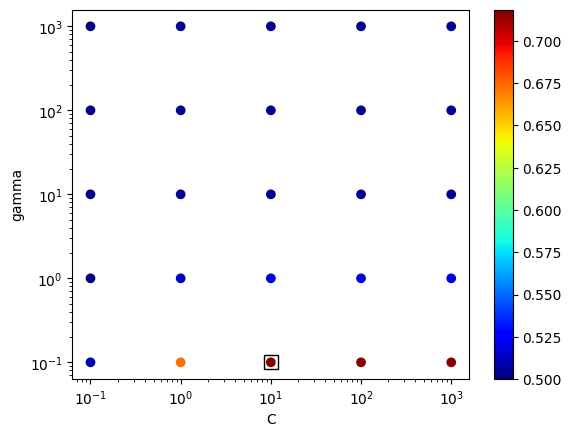

In [55]:
plt.scatter(grid_search_svm.cv_results_['param_classifier__C'], grid_search_svm.cv_results_['param_classifier__gamma'], c=grid_search_svm.cv_results_['mean_test_score'], cmap='jet');
plt.plot(grid_search_svm.best_params_['classifier__C'], grid_search_svm.best_params_['classifier__gamma'], 'ks', mfc='none', markersize=10)
plt.xlabel('C')
plt.ylabel('gamma')
plt.xscale('log')
plt.yscale('log')
plt.colorbar()
plt.show()

In [56]:
pipeline_svm = Pipeline([
    ("preprocessing", CountVectorizer()),
    ("classifier", SVC(kernel="rbf"))
])
param_grid_svm = {
    "classifier__C": np.geomspace(1, 200, 5),
    "classifier__gamma": np.geomspace(1e-2, 1, 5),
}
grid_search_svm = GridSearchCV(pipeline_svm, param_grid_svm, scoring=balanced_accuracy, n_jobs=8, verbose=2, cv=ps)

grid_search_svm.fit(X_train_val_combined, y_train_val_combined)

Fitting 1 folds for each of 25 candidates, totalling 25 fits
[CV] END ..........classifier__C=1.0, classifier__gamma=0.01; total time=  50.4s
[CV] END classifier__C=3.760603093086394, classifier__gamma=0.01; total time=  51.9s
[CV] END classifier__C=1.0, classifier__gamma=0.03162277660168379; total time= 1.1min
[CV] END ...........classifier__C=1.0, classifier__gamma=0.1; total time= 2.6min
[CV] END classifier__C=3.760603093086394, classifier__gamma=0.03162277660168379; total time= 2.6min
[CV] END classifier__C=1.0, classifier__gamma=0.31622776601683794; total time= 2.8min
[CV] END classifier__C=14.142135623730951, classifier__gamma=0.01; total time= 1.9min
[CV] END classifier__C=3.760603093086394, classifier__gamma=0.1; total time= 3.1min
[CV] END ...........classifier__C=1.0, classifier__gamma=1.0; total time= 3.2min
[CV] END classifier__C=3.760603093086394, classifier__gamma=0.31622776601683794; total time= 3.7min
[CV] END classifier__C=14.142135623730951, classifier__gamma=0.031622

GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
             estimator=Pipeline(steps=[('preprocessing', CountVectorizer()),
                                       ('classifier', SVC())]),
             n_jobs=8,
             param_grid={'classifier__C': array([  1.        ,   3.76060309,  14.14213562,  53.18295897,
       200.        ]),
                         'classifier__gamma': array([0.01      , 0.03162278, 0.1       , 0.31622777, 1.        ])},
             scoring=make_scorer(balanced_accuracy_score, response_method='predict'),
             verbose=2)

In [57]:
print("Melhores parâmetros (SVM + kernel RBF):", grid_search_svm.best_params_)
print("Melhor score (SVM + kernel RBF):", grid_search_svm.best_score_)

Melhores parâmetros (SVM + kernel RBF): {'classifier__C': 53.18295896944989, 'classifier__gamma': 0.01}
Melhor score (SVM + kernel RBF): 0.7579244581316144


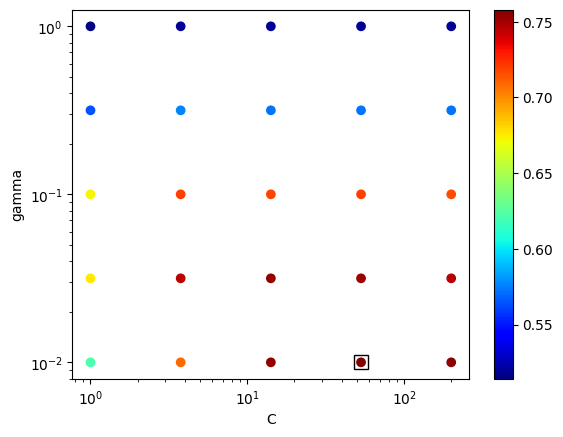

In [58]:
plt.scatter(grid_search_svm.cv_results_['param_classifier__C'], grid_search_svm.cv_results_['param_classifier__gamma'], c=grid_search_svm.cv_results_['mean_test_score'], cmap='jet');
plt.plot(grid_search_svm.best_params_['classifier__C'], grid_search_svm.best_params_['classifier__gamma'], 'ks', mfc='none', markersize=10)
plt.xlabel('C')
plt.ylabel('gamma')
plt.xscale('log')
plt.yscale('log')
plt.colorbar()
plt.show()

In [59]:
pipeline_svm = Pipeline([
    ("preprocessing", CountVectorizer()),
    ("classifier", SVC(kernel="rbf"))
])
param_grid_svm = {
    "classifier__C": np.geomspace(30, 50, 5),
    "classifier__gamma": np.geomspace(1e-3, 1e-1, 5),
}
grid_search_svm = GridSearchCV(pipeline_svm, param_grid_svm, scoring=balanced_accuracy, n_jobs=5, verbose=2, cv=ps)

grid_search_svm.fit(X_train_val_combined, y_train_val_combined)

Fitting 1 folds for each of 25 candidates, totalling 25 fits
[CV] END ........classifier__C=30.0, classifier__gamma=0.001; total time=  30.1s
[CV] END classifier__C=30.0, classifier__gamma=0.0031622776601683794; total time=  47.7s
[CV] END classifier__C=34.08658099402497, classifier__gamma=0.001; total time=  37.8s
[CV] END classifier__C=34.08658099402497, classifier__gamma=0.0031622776601683794; total time=  53.5s
[CV] END .........classifier__C=30.0, classifier__gamma=0.01; total time= 1.9min
[CV] END ..........classifier__C=30.0, classifier__gamma=0.1; total time= 2.5min
[CV] END classifier__C=30.0, classifier__gamma=0.03162277660168379; total time= 2.6min
[CV] END classifier__C=38.729833462074176, classifier__gamma=0.001; total time=  31.0s
[CV] END classifier__C=34.08658099402497, classifier__gamma=0.01; total time= 2.3min
[CV] END classifier__C=38.729833462074176, classifier__gamma=0.0031622776601683794; total time= 1.2min
[CV] END classifier__C=34.08658099402497, classifier__gam

GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
             estimator=Pipeline(steps=[('preprocessing', CountVectorizer()),
                                       ('classifier', SVC())]),
             n_jobs=5,
             param_grid={'classifier__C': array([30.        , 34.08658099, 38.72983346, 44.00558684, 50.        ]),
                         'classifier__gamma': array([0.001     , 0.00316228, 0.01      , 0.03162278, 0.1       ])},
             scoring=make_scorer(balanced_accuracy_score, response_method='predict'),
             verbose=2)

In [60]:
print("Melhores parâmetros (SVM + kernel RBF):", grid_search_svm.best_params_)
print("Melhor score (SVM + kernel RBF):", grid_search_svm.best_score_)

Melhores parâmetros (SVM + kernel RBF): {'classifier__C': 38.729833462074176, 'classifier__gamma': 0.01}
Melhor score (SVM + kernel RBF): 0.7591014967442224


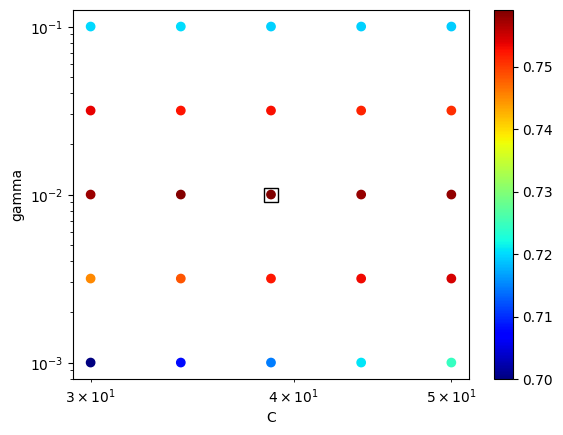

In [61]:
plt.scatter(grid_search_svm.cv_results_['param_classifier__C'], grid_search_svm.cv_results_['param_classifier__gamma'], c=grid_search_svm.cv_results_['mean_test_score'], cmap='jet');
plt.plot(grid_search_svm.best_params_['classifier__C'], grid_search_svm.best_params_['classifier__gamma'], 'ks', mfc='none', markersize=10)
plt.xlabel('C')
plt.ylabel('gamma')
plt.xscale('log')
plt.yscale('log')
plt.colorbar()
plt.show()

### Árvore de Decisão

In [62]:
pipeline_dt = Pipeline([
    ("preprocessing", CountVectorizer()),
    ("classifier", DecisionTreeClassifier()),
])
param_grid_dt = {
    # "classifier__max_depth": list(range(1, 21)),
    "classifier__max_depth": [20],
    "classifier__min_samples_split": [2],
    "classifier__min_samples_leaf": list(range(2, 21)),
    "classifier__max_leaf_nodes": list(range(20, 51)),
    "classifier__min_impurity_decrease": np.geomspace(1e-4, 1e-2, 20),
    # "classifier__ccp_alpha": np.geomspace(1e-4, 1.5e-2, 20),
}
grid_search_dt = GridSearchCV(pipeline_dt, param_grid_dt, scoring=balanced_accuracy, n_jobs=6, verbose=2, cv=ps)

In [63]:
grid_search_dt.fit(X_train_val_combined, y_train_val_combined)

Fitting 1 folds for each of 11780 candidates, totalling 11780 fits
[CV] END classifier__max_depth=20, classifier__max_leaf_nodes=20, classifier__min_impurity_decrease=0.0001, classifier__min_samples_leaf=5, classifier__min_samples_split=2; total time=   0.6s
[CV] END classifier__max_depth=20, classifier__max_leaf_nodes=20, classifier__min_impurity_decrease=0.0001, classifier__min_samples_leaf=4, classifier__min_samples_split=2; total time=   0.6s
[CV] END classifier__max_depth=20, classifier__max_leaf_nodes=20, classifier__min_impurity_decrease=0.0001, classifier__min_samples_leaf=3, classifier__min_samples_split=2; total time=   0.9s
[CV] END classifier__max_depth=20, classifier__max_leaf_nodes=20, classifier__min_impurity_decrease=0.0001, classifier__min_samples_leaf=7, classifier__min_samples_split=2; total time=   0.9s
[CV] END classifier__max_depth=20, classifier__max_leaf_nodes=20, classifier__min_impurity_decrease=0.0001, classifier__min_samples_leaf=2, classifier__min_samples_s

GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
             estimator=Pipeline(steps=[('preprocessing', CountVectorizer()),
                                       ('classifier',
                                        DecisionTreeClassifier())]),
             n_jobs=6,
             param_grid={'classifier__max_depth': [20],
                         'classifier__max_leaf_nodes': [20, 21, 22, 23, 24, 25,
                                                        26, 27, 28, 29, 30, 31,
                                                        32, 33, 34, 35, 36, 37,
                                                        38, 39, 40, 41, 42, 43,
                                                        44, 45, 46, 47, 48, 49, ...],
                         'clas...
       0.00033598, 0.00042813, 0.00054556, 0.00069519, 0.00088587,
       0.00112884, 0.00143845, 0.00183298, 0.00233572, 0.00297635,
       0.00379269, 0.00483293, 0.00615848, 0.0078476 , 0.01      ]),
                         'classifier__min_samples_leaf': [2, 3, 4, 5, 6, 7, 8,
                                                          9, 10, 11, 12, 13, 14,
                                                          15, 16, 17, 18, 19,
                                                          20],
                         'classifier__min_samples_split': [2]},
             scoring=make_scorer(balanced_accuracy_score, response_method='predict'),
             verbose=2)

In [64]:
print("Melhores parâmetros (Decision Tree):", grid_search_dt.best_params_)
print("Melhor score (Decision Tree):", grid_search_dt.best_score_)

Melhores parâmetros (Decision Tree): {'classifier__max_depth': 20, 'classifier__max_leaf_nodes': 34, 'classifier__min_impurity_decrease': 0.0001, 'classifier__min_samples_leaf': 13, 'classifier__min_samples_split': 2}
Melhor score (Decision Tree): 0.6603927159317787


### Random Forest

In [65]:
pipeline_rf = Pipeline([
    ("preprocessing", CountVectorizer()),
    ("classifier", RandomForestClassifier()),
])
param_grid_rf = {
    "classifier__n_estimators": [1000],
    "classifier__min_samples_split": list(range(2, 6)),
}
grid_search_rf = GridSearchCV(pipeline_rf, param_grid_rf, scoring=balanced_accuracy, n_jobs=6, verbose=2, cv=ps)


In [66]:
grid_search_rf.fit(X_train_val_combined, y_train_val_combined)

Fitting 1 folds for each of 4 candidates, totalling 4 fits
[CV] END classifier__min_samples_split=5, classifier__n_estimators=1000; total time= 3.3min
[CV] END classifier__min_samples_split=4, classifier__n_estimators=1000; total time= 3.7min
[CV] END classifier__min_samples_split=3, classifier__n_estimators=1000; total time= 4.1min
[CV] END classifier__min_samples_split=2, classifier__n_estimators=1000; total time= 5.1min


GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
             estimator=Pipeline(steps=[('preprocessing', CountVectorizer()),
                                       ('classifier',
                                        RandomForestClassifier())]),
             n_jobs=6,
             param_grid={'classifier__min_samples_split': [2, 3, 4, 5],
                         'classifier__n_estimators': [1000]},
             scoring=make_scorer(balanced_accuracy_score, response_method='predict'),
             verbose=2)

In [67]:

print("Melhores parâmetros (Random Forest):", grid_search_rf.best_params_)
print("Melhor score (Random Forest):", grid_search_rf.best_score_)

Melhores parâmetros (Random Forest): {'classifier__min_samples_split': 3, 'classifier__n_estimators': 1000}
Melhor score (Random Forest): 0.7178059713178395


### Gradient Boosting

In [68]:
pipeline_gb = Pipeline([
    ("preprocessing", CountVectorizer()),
    ("classifier", GradientBoostingClassifier()),
])

param_grid_gb = {
    "classifier__n_estimators": np.linspace(10, 1000, 50, dtype=int),
    "classifier__learning_rate": np.geomspace(3e-3, 1, 20),
}

grid_search_gb = GridSearchCV(
    pipeline_gb, param_grid_gb, scoring=balanced_accuracy, n_jobs=6, verbose=2, cv=ps)

In [69]:
grid_search_gb.fit(X_train_val_combined, y_train_val_combined)

Fitting 1 folds for each of 1000 candidates, totalling 1000 fits
[CV] END classifier__learning_rate=0.003, classifier__n_estimators=10; total time=   1.2s
[CV] END classifier__learning_rate=0.003, classifier__n_estimators=30; total time=   2.1s
[CV] END classifier__learning_rate=0.003, classifier__n_estimators=50; total time=   3.1s
[CV] END classifier__learning_rate=0.003, classifier__n_estimators=70; total time=   4.7s
[CV] END classifier__learning_rate=0.003, classifier__n_estimators=90; total time=   5.7s
[CV] END classifier__learning_rate=0.003, classifier__n_estimators=111; total time=   6.0s
[CV] END classifier__learning_rate=0.003, classifier__n_estimators=131; total time=   7.7s
[CV] END classifier__learning_rate=0.003, classifier__n_estimators=151; total time=   9.2s
[CV] END classifier__learning_rate=0.003, classifier__n_estimators=171; total time=  11.3s
[CV] END classifier__learning_rate=0.003, classifier__n_estimators=191; total time=  11.9s
[CV] END classifier__learning_

GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
             estimator=Pipeline(steps=[('preprocessing', CountVectorizer()),
                                       ('classifier',
                                        GradientBoostingClassifier())]),
             n_jobs=6,
             param_grid={'classifier__learning_rate': array([0.003     , 0.00407291, 0.00552952, 0.00750707, 0.01019186,
       0.01383683, 0.01878537, 0.02550368, 0.0346247 , 0.04700771,
       0.06381932, 0.086...
       0.29435243, 0.39962323, 0.54254256, 0.73657489, 1.        ]),
                         'classifier__n_estimators': array([  10,   30,   50,   70,   90,  111,  131,  151,  171,  191,  212,
        232,  252,  272,  292,  313,  333,  353,  373,  393,  414,  434,
        454,  474,  494,  515,  535,  555,  575,  595,  616,  636,  656,
        676,  696,  717,  737,  757,  777,  797,  818,  838,  858,  878,
        898,  919,  939,  959,  979, 1000])},
             scoring=make_scorer(balanced_accuracy_score, response_method='predict'),
             verbose=2)

In [70]:
print("Melhores parâmetros (Gradient Boosting):", grid_search_gb.best_params_)
print("Melhor score (Gradient Boosting):", grid_search_gb.best_score_)

Melhores parâmetros (Gradient Boosting): {'classifier__learning_rate': 0.3996232288133094, 'classifier__n_estimators': 858}
Melhor score (Gradient Boosting): 0.7529761982435765


# Análise de resultados

### Melhor modelo

O modelo que melhor desempenhou foi o SVM com kernel RBF com $C = 38.729833462074176$ e $\gamma = 0.01$

In [71]:
# best model
C = 38.729833462074176
gamma = 0.01
model = SVC(C=C, gamma=gamma, kernel="rbf", verbose=2)

In [72]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [73]:
pipeline_svm = Pipeline([
    ("preprocessing", CountVectorizer()),
    ("classifier", model)
])
pipeline_svm.fit(X_train, y_train)

[LibSVM]...........................................*...................*
optimization finished, #iter = 62256
obj = -90105.192107, rho = 0.660321
nSV = 9005, nBSV = 1529
Total nSV = 9005


Pipeline(steps=[('preprocessing', CountVectorizer()),
                ('classifier',
                 SVC(C=38.729833462074176, gamma=0.01, verbose=2))])

In [74]:
pred = pipeline_svm.predict(X_test)
cm = confusion_matrix(y_test, pred, labels=pipeline_svm.classes_)

In [75]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipeline_svm.classes_)

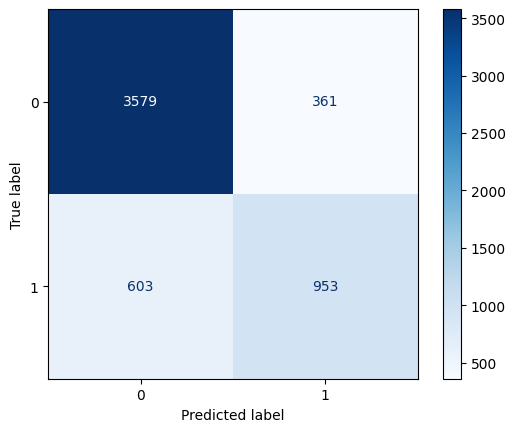

In [76]:
disp.plot(cmap='Blues')
plt.show()

In [77]:
tnr = cm[0,0]/(cm[0,0] + cm[0,1])
fpr = cm[0,1]/(cm[0,0] + cm[0,1])
fnr = cm[1,0]/(cm[1,0] + cm[1,1])
tpr = cm[1,1]/(cm[1,0] + cm[1,1])
acc = (cm[0,0] + cm[1,1])/cm.sum()

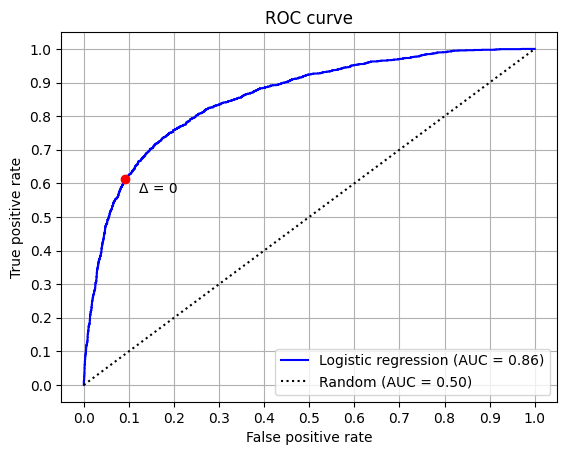

In [78]:
from sklearn.metrics import roc_auc_score, roc_curve

fprs, tprs, thresholds = roc_curve(y_test, pipeline_svm.decision_function(X_test))
auc = roc_auc_score(y_test, pipeline_svm.decision_function(X_test))
plt.plot(fprs, tprs, 'b-', label=f'Logistic regression (AUC = {auc:.2f})')
plt.plot(fpr, tpr, 'ro')
plt.annotate('Δ = 0', (fpr+0.03, tpr-0.04))
plt.plot([0, 1], [0, 1], 'k:', label='Random (AUC = 0.50)')
plt.xticks(np.linspace(0, 1, 11))
plt.yticks(np.linspace(0, 1, 11))
plt.grid()
plt.legend()
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve');

# Random Forest

In [79]:
pipeline_rf = Pipeline([
    ("preprocessing", CountVectorizer()),
    ("classifier", RandomForestClassifier(n_estimators=1000, min_samples_split=2)),
])

In [80]:
pipeline_rf.fit(X_train, y_train)

Pipeline(steps=[('preprocessing', CountVectorizer()),
                ('classifier', RandomForestClassifier(n_estimators=1000))])

### 10 palavras mais importantes

In [81]:
feature_names = pipeline_rf.named_steps["preprocessing"].get_feature_names_out()
importances = pipeline_rf.named_steps["classifier"].feature_importances_
indices = np.argsort(importances)[::-1]

for i in range(10):
    print(f"{i + 1}. {feature_names[indices[i]]} ({importances[indices[i]]:.2f})")

1. miss (0.02)
2. sad (0.01)
3. sorry (0.01)
4. hate (0.01)
5. bad (0.01)
6. sucks (0.01)
7. not (0.01)
8. sick (0.01)
9. my (0.01)
10. to (0.01)


### 5 Predições queo modelo errou

In [82]:
pred = pipeline_rf.predict(X_test)

In [83]:
df = pd.DataFrame({
    'text': X_test,
    'true_label': y_test,
    'predicted_label': pred,
})

In [84]:
incorrect_predictions = df[df['true_label'] != df['predicted_label']]

In [85]:
pd.set_option('display.max_colwidth', None)

In [86]:
incorrect_predictions.head(5)

,text,true_label,predicted_label
12155,"There go my big plans... thanks, tonsils.",1,0
10064,Now I want ice cream but it`s so expensive.,1,0
17875,Why am I so tired?????? Whyyyyy make it stop. Merm is not going to be fun tonight.,1,0
19982,And it stopped raining. Fuckingtastic! ),1,0
13532,"sitting in katies house with jo, the other two are away doing stuff, and i have swine flu and bronchitis but thats a diff story.",1,0


# Conclusão

## Reflexões sobre a Atividade

### Aprendizados

Durante esta atividade, aprendi a importância de um pipeline bem estruturado para o pré-processamento e a seleção de hiperparâmetros em modelos de aprendizado de máquina. A utilização de técnicas como `GridSearchCV` e `PredefinedSplit` mostrou-se essencial para a otimização dos modelos e a validação adequada dos resultados. Além disso, a visualização dos resultados, como a matriz de confusão e a curva ROC, foi fundamental para entender o desempenho dos modelos.

### Limitações da Abordagem Utilizada

**Dependência de Hiperparâmetros**: A abordagem utilizada depende fortemente da escolha dos hiperparâmetros. Embora o `GridSearchCV` ajude a encontrar os melhores parâmetros, o processo pode ser computacionalmente caro e demorado.

Em resumo, a atividade proporcionou um entendimento profundo sobre a construção e otimização de pipelines de machine learning, mas também destacou a necessidade de considerar limitações computacionais e a importância de técnicas de balanceamento e interpretação de modelos.